# Project: Bank Transaction Fraud Detection via Unsupervised Learning

This project applies unsupervised learning techniques to detect potential fraud in bank transactions by identifying behavioral patterns and customer segments. Using clustering algorithms such as K-Means and DBSCAN (Density-Based Spatial Clustering of Applications with Noise), the analysis focuses on user profiling and anomaly detection rather than traditional label-based classification. The project includes steps like feature engineering, dimensionality reduction, cluster evaluation, and visualization to uncover distinct transaction behaviors and detect outliers that may indicate fraudulent activity. This approach is especially valuable in real-world settings where labeled fraud data is limited.

The dataset used is publicly available on Kaggle:
https://www.kaggle.com/datasets/valakhorasani/bank-transaction-dataset-for-fraud-detection?resource=download

**Key features:**<br>- TransactionID: Unique alphanumeric identifier for each transaction <br>- AccountID: Unique identifier for each account, with multiple transactions per account <br>- TransactionAmount: Monetary value of each transaction, ranging from small everyday expenses to larger purchases <br>- TransactionDate: Timestamp of each transaction, capturing date and time <br>- TransactionType: Categorical field indicating 'Credit' or 'Debit' transactions <br>- Location: Geographic location of the transaction, represented by U.S. city names <br>- DeviceID: Alphanumeric identifier for devices used to perform the transaction <br>- IP Address: IPv4 address associated with the transaction, with occasional changes for some accounts <br>- MerchantID: Unique identifier for merchants, showing preferred and outlier merchants for each account <br>- AccountBalance: Balance in the account post-transaction, with logical correlations based on transaction type and amount <br>- PreviousTransactionDate: Timestamp of the last transaction for the account, aiding in calculating transaction frequency <br>- Channel: Channel through which the transaction was performed (e.g., Online, ATM, Branch) <br>- CustomerAge: Age of the account holder, with logical groupings based on occupation <br>- CustomerOccupation: Occupation of the account holder (e.g., Doctor, Engineer, Student, Retired), reflecting income patterns <br>- TransactionDuration: Duration of the transaction in seconds, varying by transaction type <br>- LoginAttempts: Number of login attempts before the transaction, with higher values indicating potential anomalies <br>

## Data overview

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
import matplotlib.ticker as ticker
from matplotlib.patches import Patch
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from scipy.stats import gaussian_kde
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('bank_transactions_data_2.csv')

In [3]:
data.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


In [4]:
print('Data shape: ', data.shape)

Data shape:  (2512, 16)


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

### How customers transact: channels, roles, and purposes?

This section explores how customers interact with the banking system — through which channels they transact, their occupational backgrounds, and the types of transactions they engage in. These patterns help reveal underlying user behaviors and potential risk segments.

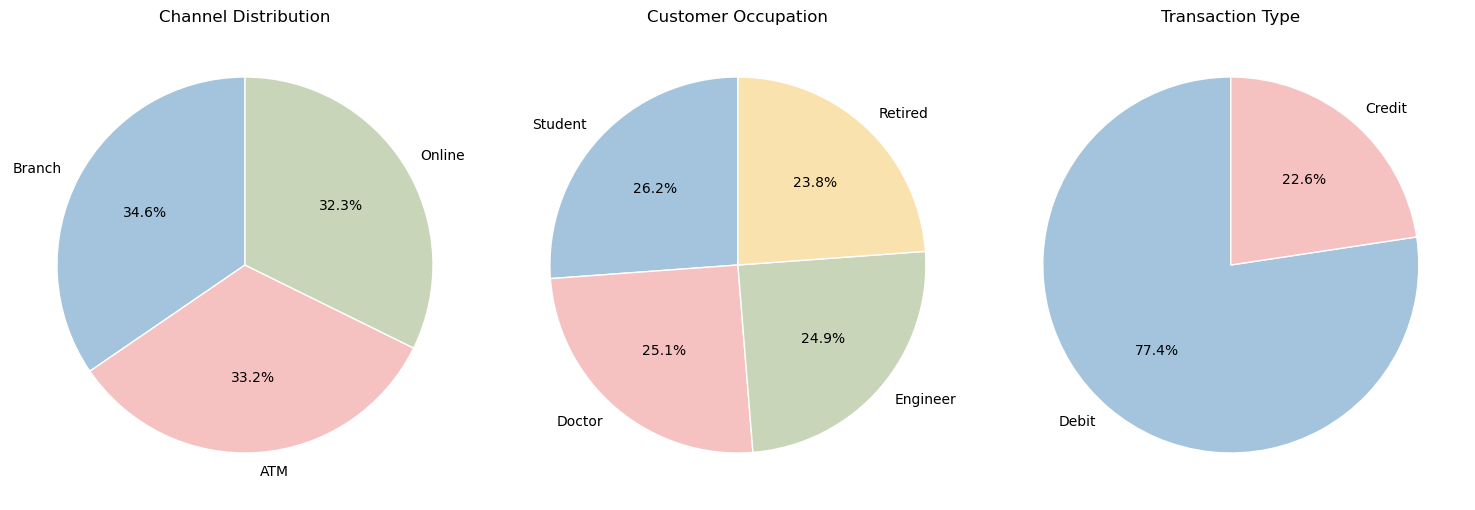

In [6]:
custom_colors = ['#A3C4DC', '#F6C1C1', '#C8D5B9', '#F9E2AE', '#D3BBDD',
                 '#B0D0D3', '#F8B195', '#F67280', '#C06C84', '#6C5B7B']

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

data['Channel'].value_counts().plot.pie(
    autopct='%1.1f%%', colors=custom_colors, startangle=90,
    textprops={'fontsize': 10}, wedgeprops={'edgecolor': 'white'}, ax=axs[0])
axs[0].set_ylabel("")
axs[0].set_title("Channel Distribution")

data['CustomerOccupation'].value_counts().plot.pie(
    autopct='%1.1f%%', colors=custom_colors, startangle=90,
    textprops={'fontsize': 10}, wedgeprops={'edgecolor': 'white'}, ax=axs[1])
axs[1].set_ylabel("")
axs[1].set_title("Customer Occupation")

data['TransactionType'].value_counts().plot.pie(
    autopct='%1.1f%%', colors=custom_colors, startangle=90,
    textprops={'fontsize': 10}, wedgeprops={'edgecolor': 'white'}, ax=axs[2])
axs[2].set_ylabel("")
axs[2].set_title("Transaction Type")

plt.tight_layout()
plt.show()

### What do user activity and attributes look like?

This section explores the distribution of key numerical features related to customer behavior and profile characteristics. Variables such as transaction duration, login attempts, account balance, and customer age reveal underlying patterns in how users interact with the banking system. Understanding these distributions helps in identifying typical user profiles and detecting unusual behaviors that may signal fraud.

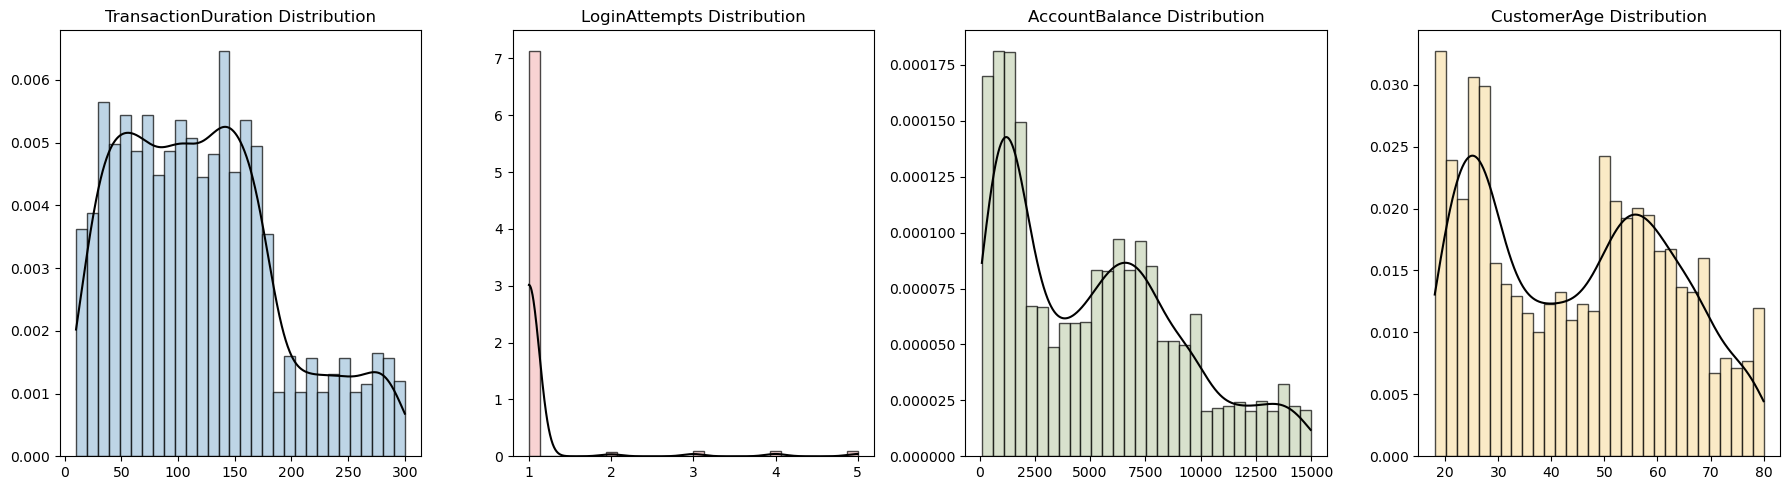

In [7]:
custom_colors = ['#A3C4DC', '#F6C1C1', '#C8D5B9', '#F9E2AE']

fig, axs = plt.subplots(1, 4, figsize=(18, 5))

features = ['TransactionDuration', 'LoginAttempts', 'AccountBalance', 'CustomerAge']

for i, feature in enumerate(features):
    data_feature = data[feature].dropna()

    axs[i].hist(data_feature, bins=30, color=custom_colors[i], alpha=0.7, density=True, edgecolor='black')
    kde = gaussian_kde(data_feature)
    x_range = np.linspace(data_feature.min(), data_feature.max(), 1000)
    axs[i].plot(x_range, kde(x_range), color='black', linewidth=1.5)
    axs[i].set_title(f'{feature} Distribution')

plt.tight_layout()
plt.show()

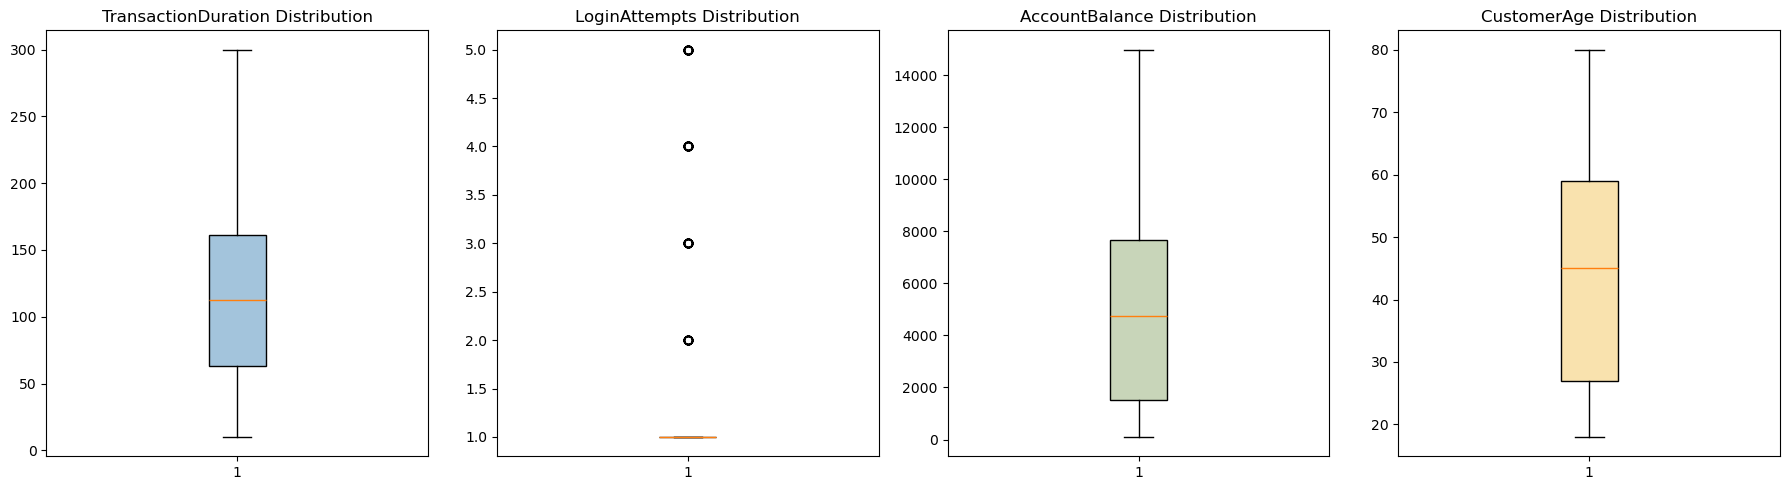

In [8]:
custom_colors = ['#A3C4DC', '#F6C1C1', '#C8D5B9', '#F9E2AE']

fig, axs = plt.subplots(1, 4, figsize=(18, 5))
features = ['TransactionDuration', 'LoginAttempts', 'AccountBalance', 'CustomerAge']
for i, feature in enumerate(features):
    box = axs[i].boxplot(data[feature].dropna(), patch_artist=True, boxprops=dict(facecolor=custom_colors[i]))
    axs[i].set_title(f'{feature} Distribution')

plt.tight_layout()
plt.show()

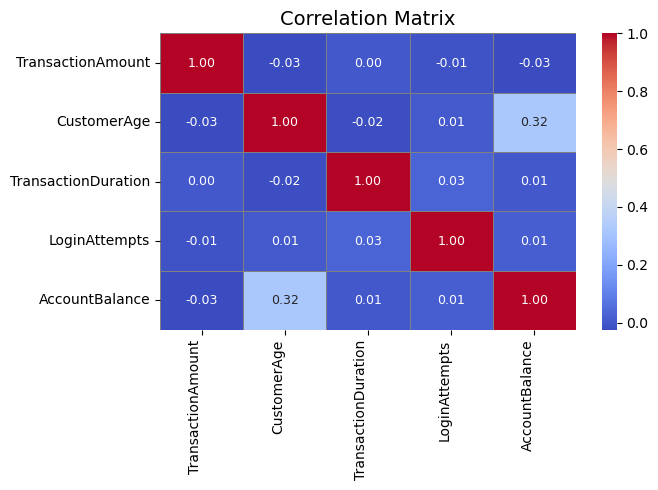

In [9]:
corr = data.select_dtypes(include='number').corr()

plt.figure(figsize=(7, 5))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5, linecolor='gray', annot_kws={"size":9})

plt.title('Correlation Matrix', fontsize=14)
plt.xticks(rotation=90, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## KMeans Algorithm

In [10]:
features = ['TransactionDuration', 'LoginAttempts', 'AccountBalance', 'CustomerAge']
X = data[features]

# scaling features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### finding optimal K by using Elbow method

The Elbow Method is used to determine the optimal number of clusters (k) in K-Means clustering. By plotting the explained variance (or within-cluster sum of squares) against different values of k, we look for a point—called the "elbow"—where adding more clusters yields diminishing returns in reducing variance. This helps choose a balance between model complexity and goodness of fit, avoiding both underfitting and overfitting.

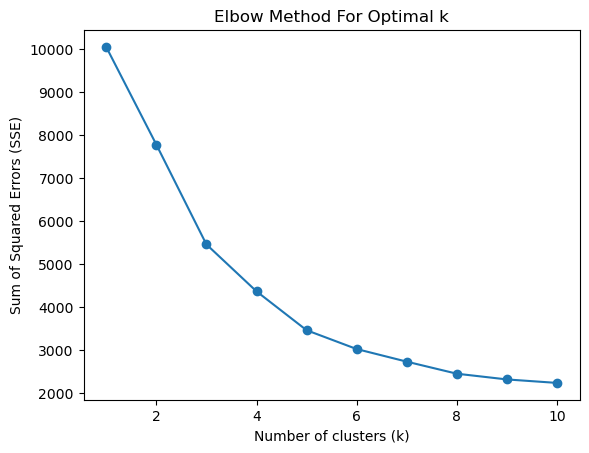

In [11]:
sse = []
k_range = range(1, 11)  

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)  

plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method For Optimal k')
plt.show()

In [12]:
kmeans = KMeans(n_clusters=5, random_state=42)
data['cluster'] = kmeans.fit_predict(X_scaled)

In [13]:
# Calculate the average values of features for each cluster
cluster_summary = data.groupby('cluster')[features].mean()
print(cluster_summary)

         TransactionDuration  LoginAttempts  AccountBalance  CustomerAge
cluster                                                                 
0                 100.101549       1.012048    10123.857005    44.506024
1                  97.211594       1.010145     1636.831942    25.856522
2                 131.884211       4.010526     5461.643053    44.536842
3                  93.796813       1.011952     4516.106162    62.313413
4                 234.480916       1.010178     4876.005242    44.195929


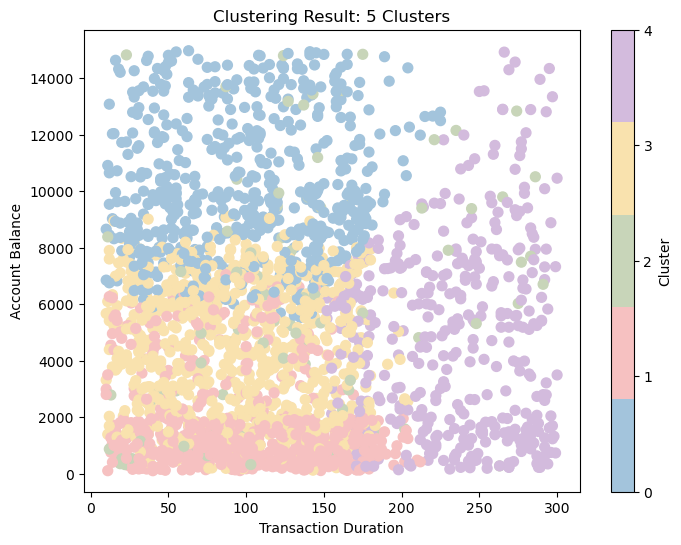

In [14]:
custom_colors = ['#A3C4DC', '#F6C1C1', '#C8D5B9', '#F9E2AE', '#D3BBDD']
cmap = mcolors.ListedColormap(custom_colors)

plt.figure(figsize=(8,6))
scatter = plt.scatter(data['TransactionDuration'], data['AccountBalance'], c=data['cluster'], cmap=cmap, s=50)
plt.xlabel('Transaction Duration')
plt.ylabel('Account Balance')
plt.title('Clustering Result: 5 Clusters')

cbar = plt.colorbar(scatter, ticks=range(len(custom_colors)))
cbar.set_label('Cluster')
cbar.ax.yaxis.set_major_locator(ticker.FixedLocator(range(len(custom_colors))))

plt.show()

In [15]:
# Perform PCA for dimensionality reduction (to 2D for visualization)
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Add PCA results to the DataFrame
data['pca1'] = X_pca[:, 0]  # First principal component
data['pca2'] = X_pca[:, 1]  # Second principal component

# Print explained variance ratios
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Cumulative explained variance:", sum(pca.explained_variance_ratio_))

Explained variance ratio: [0.3302251  0.25830682]
Cumulative explained variance: 0.5885319183727113


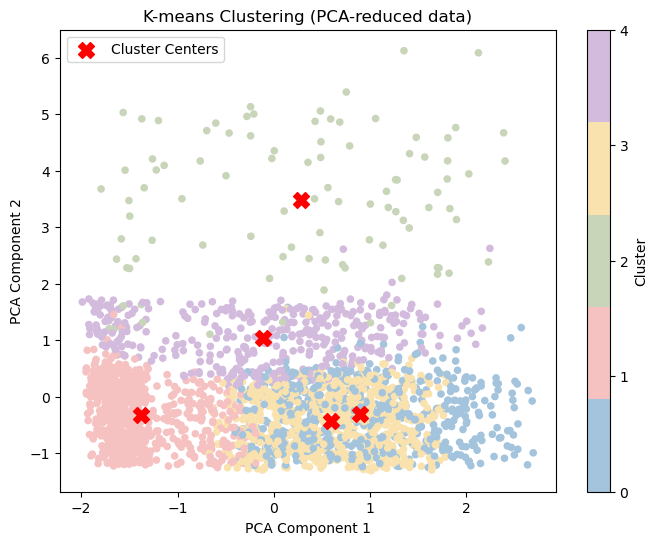

In [16]:
# Calculate cluster centers in the PCA space
cluster_centers = []
for cluster_id in np.unique(data['cluster']):
    # Select points that belong to the current cluster
    points = X_pca[data['cluster'] == cluster_id]
    # Compute the mean (center) of these points
    center = points.mean(axis=0)
    cluster_centers.append(center)
cluster_centers = np.array(cluster_centers)

# Plot the PCA scatter plot colored by cluster labels
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['cluster'], cmap=cmap, s=20)

# Plot cluster centers as bigger black 'X' markers
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', s=130, marker='X', label='Cluster Centers')

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-means Clustering (PCA-reduced data)')
cbar = plt.colorbar(scatter, ticks=range(len(np.unique(data['cluster']))))
cbar.set_label('Cluster')

plt.grid(False)
plt.legend()
plt.show()

### K-Means clustering results

The K-Means algorithm identified a total of 5 clusters in the dataset. Clusters 1, 3, 4, and 5 are relatively compact and well-defined, indicating groups of customers with similar transaction behaviors. In contrast, Cluster 2 is notably more dispersed and overlaps partially with other clusters, suggesting a higher heterogeneity within this group. Based on this observation, customers assigned to Cluster 2 are preliminarily considered to have the highest likelihood of fraudulent activity. This insight provides a focused target for further investigation and potential fraud detection.

## DBSCAN Algorithm

In [17]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

In [18]:
data['DBSCAN_label'] = dbscan.fit_predict(X_scaled)

In [19]:
n_noise = np.sum(labels == -1)
print(f"Number of noises: {n_noise}")

Number of noises: 126


In [20]:
dbscan.core_sample_indices_

array([   0,    1,    2, ..., 2509, 2510, 2511], dtype=int64)

In [21]:
dbscan.components_

array([[-5.52443263e-01, -2.06793649e-01, -5.36635052e-04,
         1.42371826e+00],
       [ 3.05314366e-01, -2.06793649e-01,  2.21647159e+00,
         1.31128706e+00],
       [-9.09842275e-01, -2.06793649e-01, -1.02353413e+00,
        -1.44327736e+00],
       ...,
       [ 3.76794169e-01, -2.06793649e-01, -4.43928023e-01,
         6.36699859e-01],
       [-1.43879281e+00, -2.06793649e-01, -8.55705373e-01,
        -1.21841495e+00],
       [-3.80891737e-01, -2.06793649e-01, -1.27765152e+00,
        -1.16219935e+00]])

In [22]:
data.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,cluster,pca1,pca2,DBSCAN_label
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08,3,1.007666,-0.600288,0
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35,0,2.474264,0.058072,0
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04,1,-1.731433,-0.750395,0
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06,0,-0.095626,-1.047717,0
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39,4,-0.357238,0.711047,0


In [23]:
data['DBSCAN_label'].unique()

array([ 0, -1,  3,  2,  1,  4], dtype=int64)

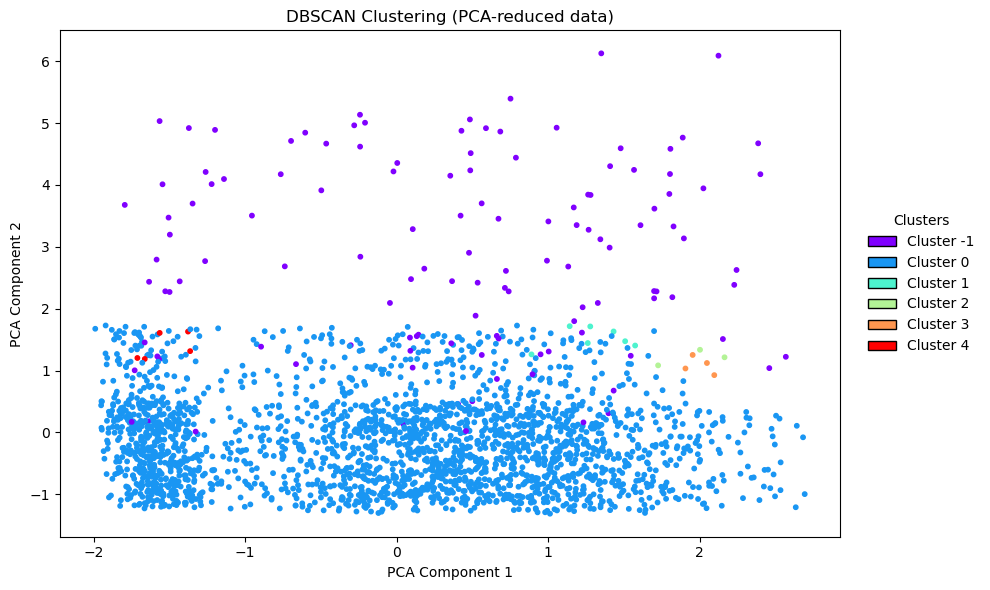

In [24]:
plt.figure(figsize=(10, 6))  

scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['DBSCAN_label'], cmap='rainbow', s=10)

unique_labels = np.unique(data['DBSCAN_label'])

colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))
legend_elements = [Patch(facecolor=colors[i], edgecolor='k', label=f'Cluster {int(label)}') 
    for i, label in enumerate(unique_labels)]

plt.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1.02, 0.5),  title="Clusters",frameon=False)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('DBSCAN Clustering (PCA-reduced data)')
plt.grid(False)
plt.tight_layout() 
plt.show()

### DBSCAN clustering result analysis

### Fraudulent vs. Non-fraudulent users: comparative analysis

In [25]:
data['DBSCAN_label'] = labels
fraud_customers = data[data['DBSCAN_label'] == -1]
fraud_customers.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,cluster,pca1,pca2,DBSCAN_label
23,TX000024,AC00453,345.84,2023-05-02 18:25:46,Debit,Fort Worth,D000162,191.82.103.198,M083,Online,22,Student,142,3,1402.50,2024-11-04 08:07:04,2,-1.431221,2.441591,-1
26,TX000027,AC00441,246.93,2023-04-17 16:37:01,Debit,Miami,D000046,55.154.161.250,M029,ATM,23,Student,158,5,673.35,2024-11-04 08:11:38,2,-1.370734,4.919726,-1
32,TX000033,AC00060,396.45,2023-09-25 16:26:00,Debit,New York,D000621,133.67.250.163,M007,ATM,49,Engineer,168,3,9690.15,2024-11-04 08:11:13,2,1.132648,2.680956,-1
38,TX000039,AC00478,795.31,2023-10-12 17:07:40,Debit,Mesa,D000077,49.29.37.185,M048,ATM,66,Doctor,90,2,7914.88,2024-11-04 08:11:17,3,1.432247,0.675167,-1
61,TX000062,AC00002,263.99,2023-05-16 16:07:30,Debit,Dallas,D000285,7.146.35.122,M087,Branch,79,Retired,227,2,4175.02,2024-11-04 08:11:03,4,1.227610,2.022670,-1


In [26]:
no_fraud_customers = data[data['DBSCAN_label'] != -1]
no_fraud_customers.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,cluster,pca1,pca2,DBSCAN_label
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08,3,1.007666,-0.600288,0
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35,0,2.474264,0.058072,0
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04,1,-1.731433,-0.750395,0
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06,0,-0.095626,-1.047717,0
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39,4,-0.357238,0.711047,0


In [27]:
data['DBSCAN_category'] = data['DBSCAN_label'].apply(lambda x: 'fraud' if x == -1 else 'no_fraud')

#### Mean and std comparison: fraud vs. non-fraud users

In [28]:
no_fraud_customers.describe().style.highlight_max(color='lightcoral').highlight_min(color='lightblue')

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,cluster,pca1,pca2,DBSCAN_label
count,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000
mean,297.698407,44.552808,118.407376,1.004191,5080.860302,1.866303,-0.019974,-0.152202,0.018860
std,292.648955,17.745225,69.369107,0.091478,3873.149063,1.476631,1.144229,0.712182,0.237166
min,0.260000,18.000000,10.000000,1.000000,101.250000,0.000000,-1.988501,-1.314367,0.000000
25%,81.180000,27.000000,63.000000,1.000000,1499.685000,1.000000,-1.215797,-0.732464,0.000000
50%,211.140000,45.000000,110.500000,1.000000,4717.175000,1.000000,0.112390,-0.233792,0.000000
75%,415.785000,59.000000,161.000000,1.000000,7619.557500,3.000000,0.887782,0.275237,0.000000
max,1919.110000,80.000000,300.000000,3.000000,14977.990000,4.000000,2.692953,1.728254,4.000000


In [29]:
fraud_customers.describe().style.highlight_max(color='lightcoral').highlight_min(color='lightblue')

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,cluster,pca1,pca2,DBSCAN_label
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,295.612460,46.968254,143.047619,3.404762,5747.590238,2.047619,0.378247,2.882166,-1.000000
std,279.414031,18.583837,77.030161,1.272343,4363.034818,0.875051,1.188394,1.506912,0.000000
min,1.930000,18.000000,11.000000,1.000000,271.780000,0.000000,-1.793698,0.013197,-1.000000
25%,99.357500,29.250000,90.250000,2.000000,1610.840000,2.000000,-0.488707,1.538231,-1.000000
50%,214.275000,49.000000,136.000000,4.000000,5177.870000,2.000000,0.510231,2.816504,-1.000000
75%,391.130000,61.000000,178.250000,4.750000,9240.670000,2.000000,1.276735,4.173316,-1.000000
max,1531.310000,80.000000,296.000000,5.000000,14851.280000,4.000000,2.568412,6.127202,-1.000000


#### Distribution comparison: fraud vs. non-fraud users

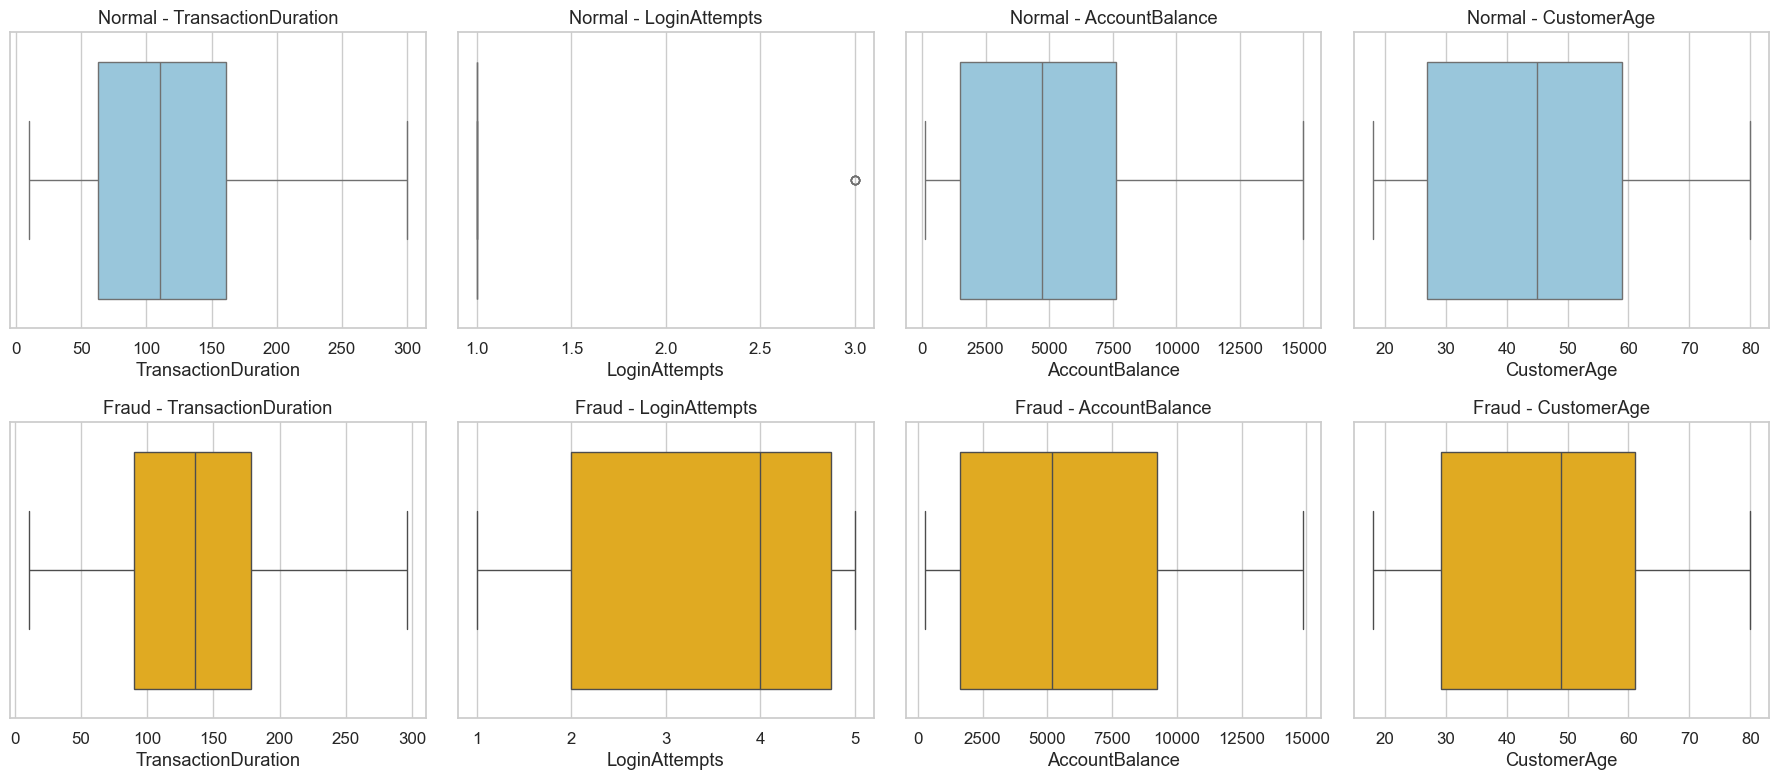

In [30]:
sns.set(style="whitegrid", palette="pastel", font_scale=1.1) 

fig, axs = plt.subplots(2, 4, figsize=(18, 8))

# Normal users
sns.boxplot(x=no_fraud_customers['TransactionDuration'], ax=axs[0, 0], color="#8ecae6")
axs[0, 0].set_title('Normal - TransactionDuration')
sns.boxplot(x=no_fraud_customers['LoginAttempts'], ax=axs[0, 1], color="#8ecae6")
axs[0, 1].set_title('Normal - LoginAttempts')
sns.boxplot(x=no_fraud_customers['AccountBalance'], ax=axs[0, 2], color="#8ecae6")
axs[0, 2].set_title('Normal - AccountBalance')
sns.boxplot(x=no_fraud_customers['CustomerAge'], ax=axs[0, 3], color="#8ecae6")
axs[0, 3].set_title('Normal - CustomerAge')

# Fraudent users
sns.boxplot(x=fraud_customers['TransactionDuration'], ax=axs[1, 0], color="#ffb703")
axs[1, 0].set_title('Fraud - TransactionDuration')
sns.boxplot(x=fraud_customers['LoginAttempts'], ax=axs[1, 1], color="#ffb703")
axs[1, 1].set_title('Fraud - LoginAttempts')
sns.boxplot(x=fraud_customers['AccountBalance'], ax=axs[1, 2], color="#ffb703")
axs[1, 2].set_title('Fraud - AccountBalance')
sns.boxplot(x=fraud_customers['CustomerAge'], ax=axs[1, 3], color="#ffb703")
axs[1, 3].set_title('Fraud - CustomerAge')

plt.tight_layout()
plt.show()

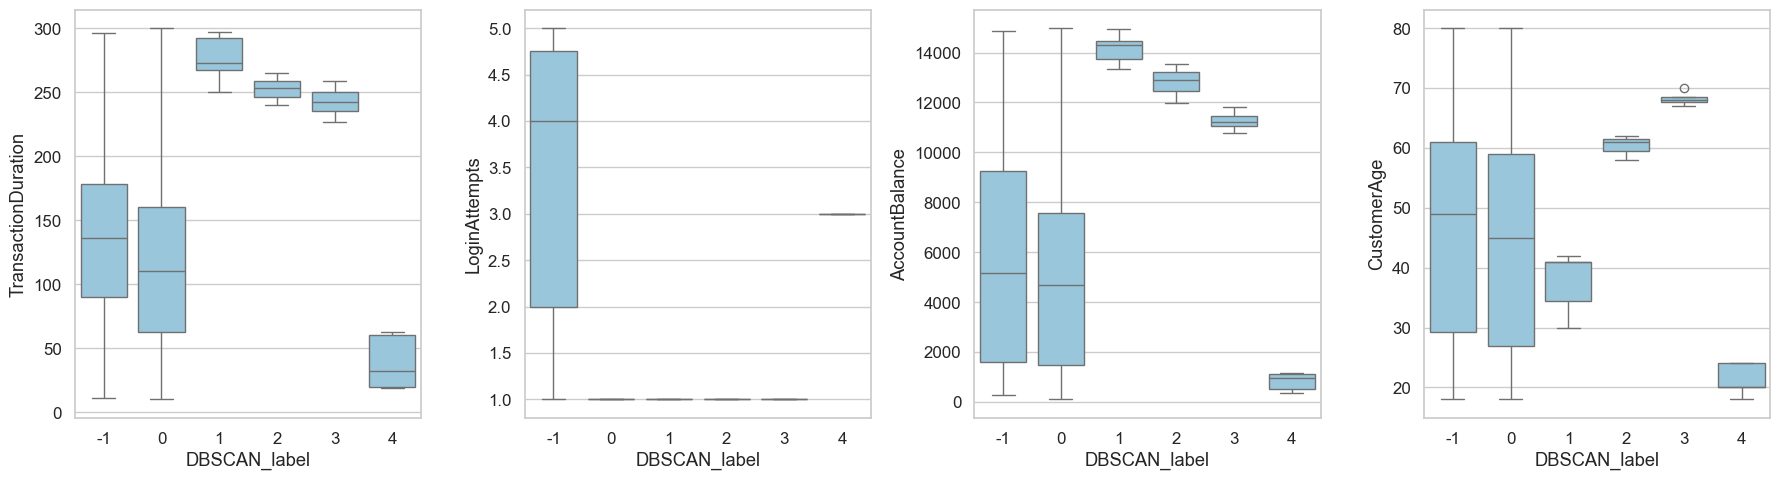

In [31]:
fig, axs = plt.subplots(1, 4, figsize=(18, 5))

sns.boxplot(data=data, x='DBSCAN_label', y='TransactionDuration', ax=axs[0], color="#8ecae6")  
sns.boxplot(data=data, x='DBSCAN_label', y='LoginAttempts', ax=axs[1], color="#8ecae6")
sns.boxplot(data=data, x='DBSCAN_label', y='AccountBalance', ax=axs[2], color="#8ecae6")
sns.boxplot(data=data, x='DBSCAN_label', y='CustomerAge', ax=axs[3], color="#8ecae6")

plt.tight_layout()
plt.show()

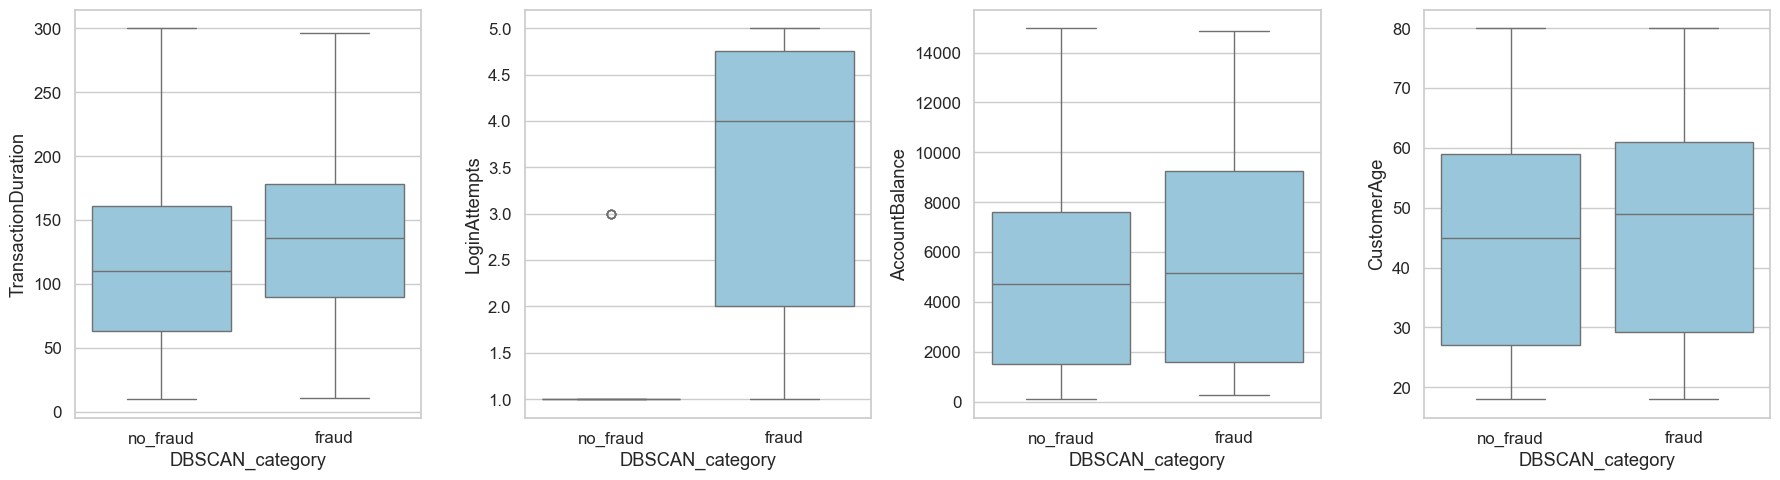

In [32]:
fig, axs = plt.subplots(1, 4, figsize=(18, 5))

sns.boxplot(data=data, x='DBSCAN_category', y='TransactionDuration', ax=axs[0], color="#8ecae6")  
sns.boxplot(data=data, x='DBSCAN_category', y='LoginAttempts', ax=axs[1], color="#8ecae6")
sns.boxplot(data=data, x='DBSCAN_category', y='AccountBalance', ax=axs[2], color="#8ecae6")
sns.boxplot(data=data, x='DBSCAN_category', y='CustomerAge', ax=axs[3], color="#8ecae6")

plt.tight_layout()
plt.show()

#### Transaction type comparison: fraud vs. non-fraud users

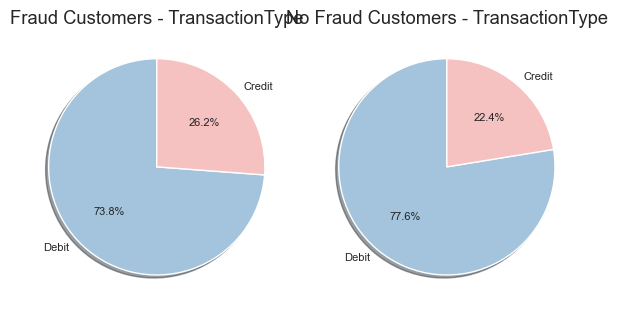

In [33]:
fig, axs = plt.subplots(1, 2, figsize=(6, 6))  
custom_colors = ['#A3C4DC', '#F6C1C1', '#C8D5B9', '#F9E2AE', '#D3BBDD',
                 '#B0D0D3', '#F8B195', '#F67280', '#C06C84', '#6C5B7B']

fraud_customers['TransactionType'].value_counts().plot.pie(
    autopct='%1.1f%%', colors=custom_colors, startangle=90,
    textprops={'fontsize': 8}, wedgeprops={'edgecolor': 'white'}, ax=axs[0], shadow=True, 
    title='Fraud Customers - TransactionType')
axs[0].set_ylabel('')  


no_fraud_customers['TransactionType'].value_counts().plot.pie(
    autopct='%1.1f%%', colors=custom_colors, startangle=90,
    textprops={'fontsize': 8}, wedgeprops={'edgecolor': 'white'}, ax=axs[1], shadow=True, 
    title='No Fraud Customers - TransactionType')
axs[1].set_ylabel('') 

plt.tight_layout()
plt.show()


#### Customer occupation comparison: fraud vs non-raud'

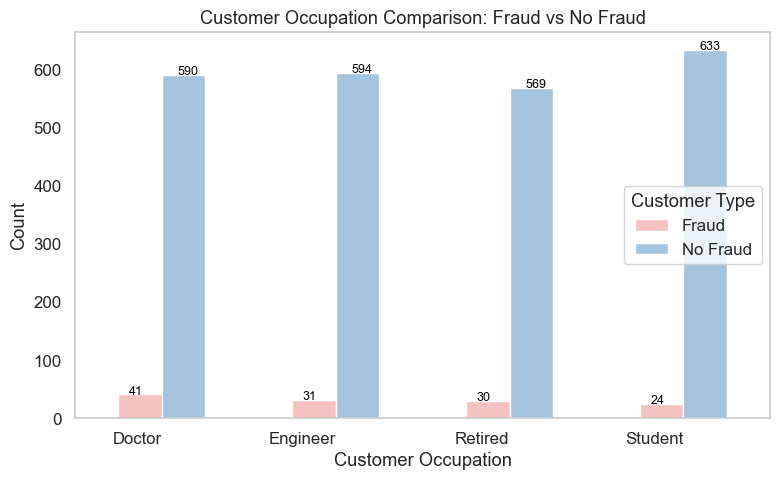

In [34]:
custom_colors = ['#F6C1C1', '#A3C4DC']  # Fraud & No Fraud 

fraud_customers.columns = fraud_customers.columns.str.strip()
no_fraud_customers.columns = no_fraud_customers.columns.str.strip()

fraud_counts = fraud_customers['CustomerOccupation'].value_counts()
no_fraud_counts = no_fraud_customers['CustomerOccupation'].value_counts()

occupation_df = pd.DataFrame({'Fraud': fraud_counts, 'No Fraud': no_fraud_counts})
occupation_df = occupation_df.fillna(0)  
occupation_df = occupation_df.sort_values(by='Fraud', ascending=False)

ax = occupation_df.plot(kind='bar', figsize=(8, 5), color=custom_colors)
plt.title('Customer Occupation Comparison: Fraud vs No Fraud')
plt.xlabel('Customer Occupation')
plt.ylabel('Count')
plt.xticks(rotation=0, ha='right')
plt.legend(title='Customer Type')

for i, (fraud, no_fraud) in enumerate(zip(occupation_df['Fraud'], occupation_df['No Fraud'])):
    ax.text(i - 0.15, fraud + 0.5, int(fraud), color='black', ha='center', fontsize=9)
    ax.text(i + 0.15, no_fraud + 0.5, int(no_fraud), color='black', ha='center', fontsize=9)

plt.grid(False)
plt.tight_layout()
plt.show()

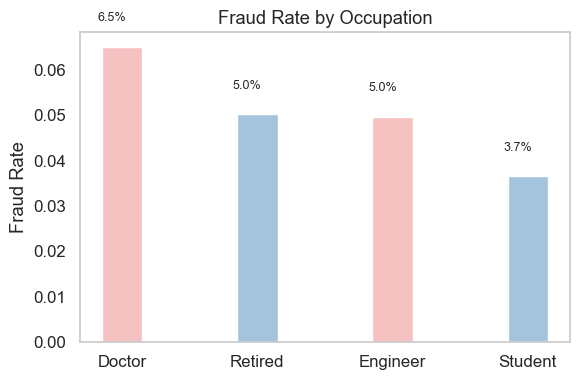

In [35]:
# total clients
total_counts = data['CustomerOccupation'].value_counts()
# fraud clients
fraud_counts = fraud_customers['CustomerOccupation'].value_counts()
# fraud rate
fraud_rate = (fraud_counts / total_counts).fillna(0).sort_values(ascending=False)

plt.figure(figsize=(6,4))
bars = plt.bar(fraud_rate.index, fraud_rate.values, color=custom_colors, width=0.3)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 4, height+ 0.005 ,
        f"{height:.1%}",  ha='center', va='bottom', fontsize=9)

plt.title('Fraud Rate by Occupation')
plt.ylabel('Fraud Rate')
plt.xticks()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.grid(False)
plt.tight_layout()
plt.show()

#### Transaction channel comparison: fraud vs non-raud

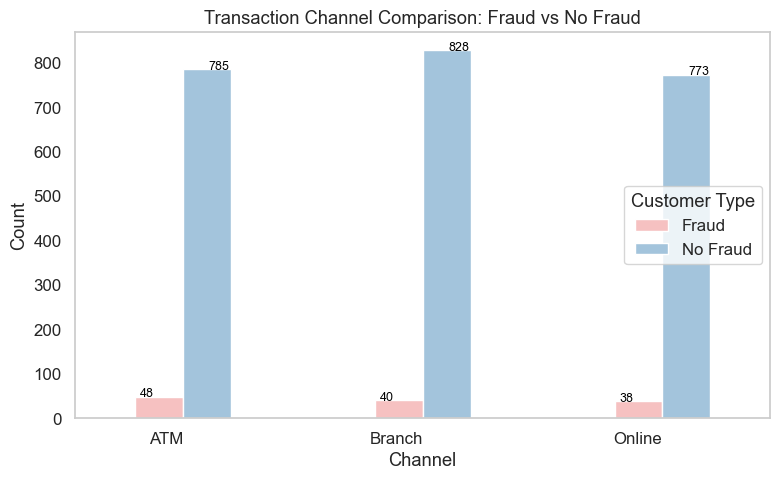

In [36]:
custom_colors = ['#F6C1C1', '#A3C4DC',  '#C8D5B9', '#F9E2AE', '#D3BBDD',
                 '#B0D0D3', '#F8B195', '#F67280', '#C06C84', '#6C5B7B']

fraud_customers.columns = fraud_customers.columns.str.strip()
no_fraud_customers.columns = no_fraud_customers.columns.str.strip()

fraud_counts = fraud_customers['Channel'].value_counts()
no_fraud_counts = no_fraud_customers['Channel'].value_counts()

occupation_df = pd.DataFrame({'Fraud': fraud_counts, 'No Fraud': no_fraud_counts})
occupation_df = occupation_df.sort_values(by='Fraud', ascending=False)

ax = occupation_df.plot(kind='bar', figsize=(8, 5), color=custom_colors, width=0.4)

plt.title('Transaction Channel Comparison: Fraud vs No Fraud')
plt.xlabel('Channel')
plt.ylabel('Count')
plt.xticks(rotation=0, ha='right')
plt.legend(title='Customer Type')

for i, (fraud, no_fraud) in enumerate(zip(occupation_df['Fraud'], occupation_df['No Fraud'])):
    ax.text(i - 0.15, fraud + 0.5, int(fraud), color='black', ha='center', fontsize=9)
    ax.text(i + 0.15, no_fraud + 0.5, int(no_fraud), color='black', ha='center', fontsize=9)

plt.grid(False)
plt.tight_layout()
plt.show()

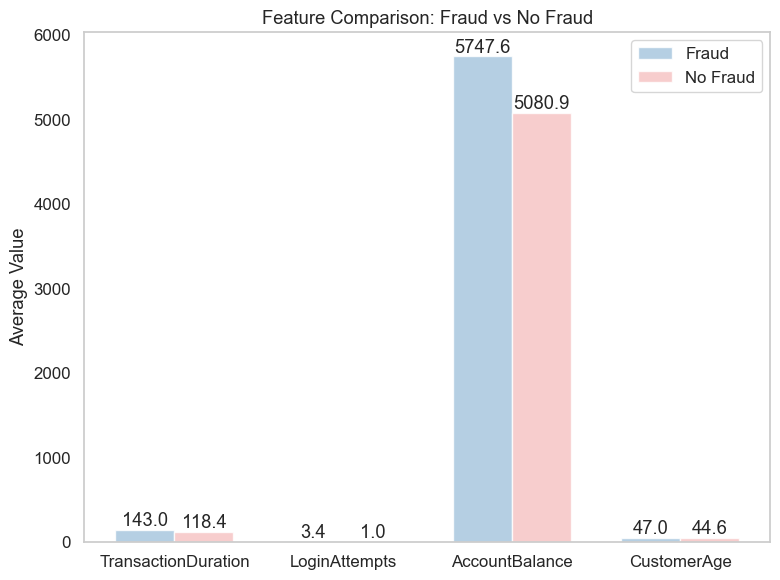

In [37]:
labels = ['TransactionDuration', 'LoginAttempts', 'AccountBalance', 'CustomerAge']
fraud_means = fraud_customers[labels].mean()
no_fraud_means = no_fraud_customers[labels].mean()

x = np.arange(len(labels))  
width = 0.35 

fig, ax = plt.subplots(figsize=(8,6))
bars1 = ax.bar(x - width/2, fraud_means, width, label='Fraud', color=custom_colors[1], alpha=0.8)
bars2 = ax.bar(x + width/2, no_fraud_means, width, label='No Fraud', color=custom_colors[0], alpha=0.8)

for bar in bars1:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height, f'{height:.1f}', ha='center', va='bottom')

for bar in bars2:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height, f'{height:.1f}', ha='center', va='bottom')

ax.set_ylabel('Average Value')
ax.set_title('Feature Comparison: Fraud vs No Fraud')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.grid(False)
plt.tight_layout()
plt.show()